In [14]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("../../data/cleaned_reviews.tsv", sep="\t")

In [16]:
df

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary
0,4,2,True,"04 6, 2017",Amazon Customer,helpful,Four Stars
1,5,0,True,"03 14, 2017",Amazon Customer,easy understand prompt service,Five Stars
2,4,0,True,"02 14, 2017",Christopher Burnett,girlfriend use quite often,Four Stars
3,5,0,True,"01 29, 2017",Amazon Customer,arrive described happy,Very happy.
4,5,0,True,"01 4, 2017",Iheartmanatees,love dummy series never fails,Love the Dummies Series
...,...,...,...,...,...,...,...
21654,5,0,True,"02 24, 2014",Nadia,like marie claire much anymore content nice ha...,Marie Claire
21655,5,0,True,"02 13, 2014",Deborah N.,ive reading mc several year ereader ive age ey...,LOVE THIS MAGAZINE!
21656,1,2,True,"02 12, 2014",Coco,cancel subscription diversity cover girl color...,Diversity??
21657,3,2,True,"02 4, 2014",Doris M. Goodhues,nothing ad go magazine 5 minute sad guess that...,Too many ads


In [17]:
five_star_reviews = df.loc[df.rating == 5]
one_star_reviews = df.loc[df.rating == 1]

In [18]:
len(five_star_reviews)

14029

In [19]:
len(one_star_reviews)

2017

In [20]:
one_star_words = one_star_reviews.assign(word = one_star_reviews["reviewText"].str.split()).explode("word")["word"]
five_star_words = five_star_reviews.assign(word = five_star_reviews["reviewText"].str.split()).explode("word")["word"]
one_star_words.head()

95              save
95    oftalmologists
95             visit
95               buy
95         paperback
Name: word, dtype: object

In [21]:
counted_one_star: dict[str, int] = (one_star_words.value_counts()).head(1000).to_dict()
counted_five_star: dict[str, int] = (five_star_words.value_counts()).head(1000).to_dict()

In [22]:
wc_one_star = WordCloud(width=1200, height=500, max_words=500).generate_from_frequencies(counted_one_star)
wc_one_star.to_file("../../report/img/one_star_wordcloud.png")
wc_five_star = WordCloud(width=1200, height=500, max_words=500).generate_from_frequencies(counted_five_star)
wc_five_star.to_file("../../report/img/five_star_wordcloud.png")

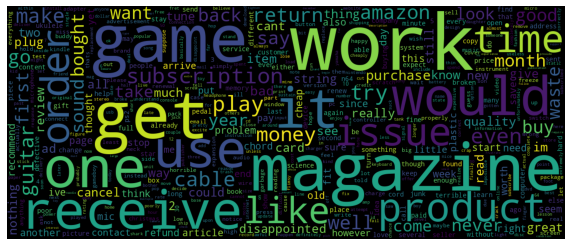

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(wc_one_star)
plt.axis('off')
plt.show()

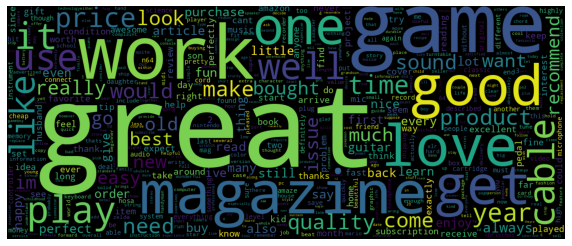

In [24]:
plt.figure(figsize=(10, 10))
plt.imshow(wc_five_star)
plt.axis('off')
plt.show()